# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Reading the csv dataset

In [3]:
data = pd.read_csv(r"C:\Users\SAI DINESH\Downloads\archive (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first few rows of the dataset

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

# Describing the data 

In [6]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

# Check for missing values

In [7]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Performing Exploratory data Analysis for the dataset and possible visual aids

#  Distribution of the target variable 'Attrition'

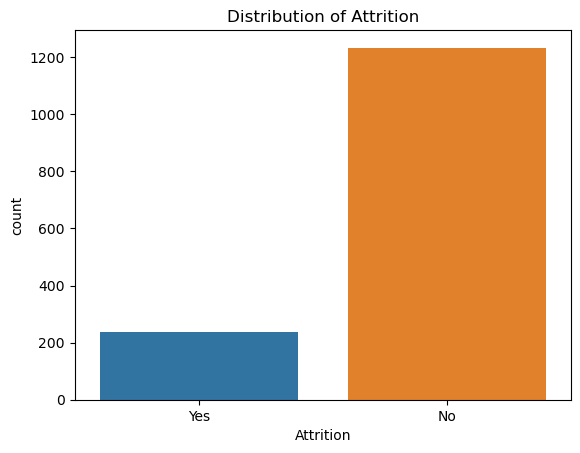

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.show()



# Encode 'Attrition' using label encoding, Exclude non-numeric columns before calculating the correlation matrix,and also plotting correlation matrix

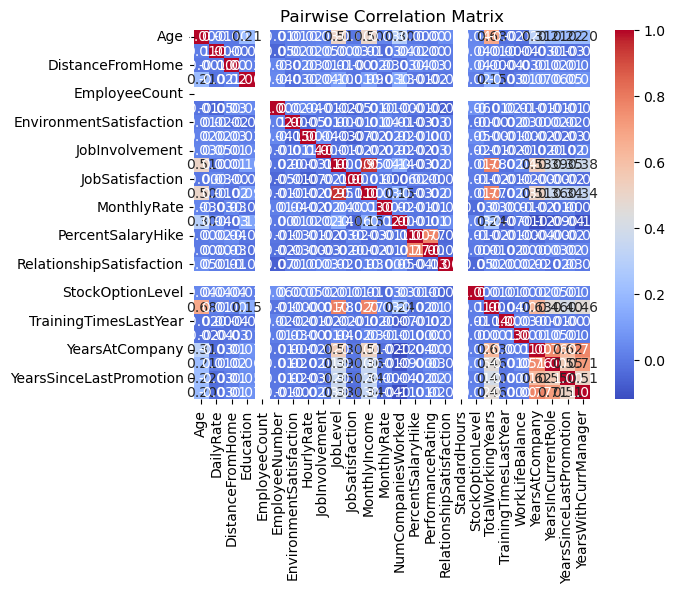

In [9]:
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])


numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

# Plot the pairwise correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

# Histogram Distribution

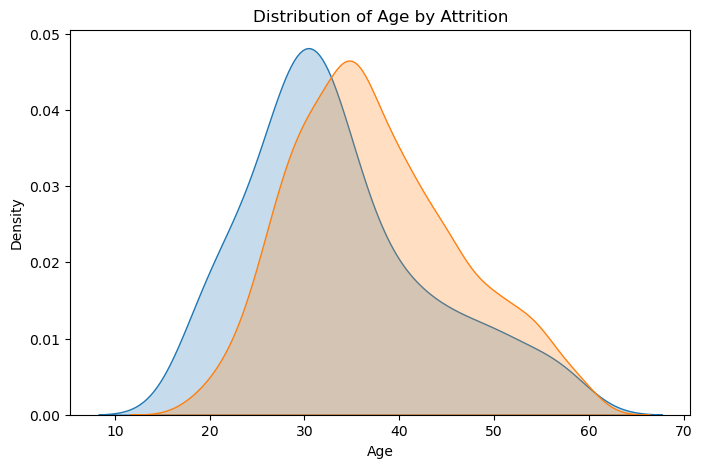

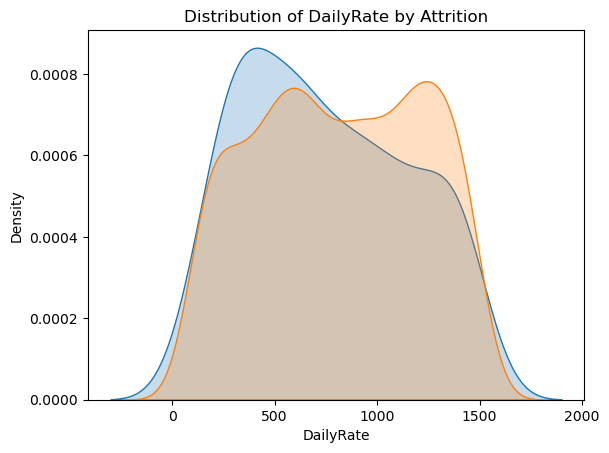

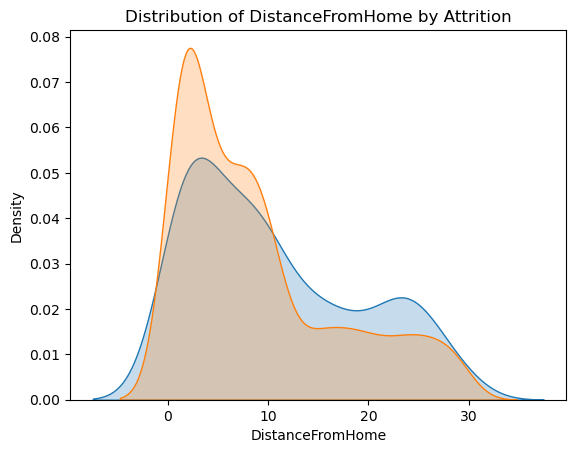

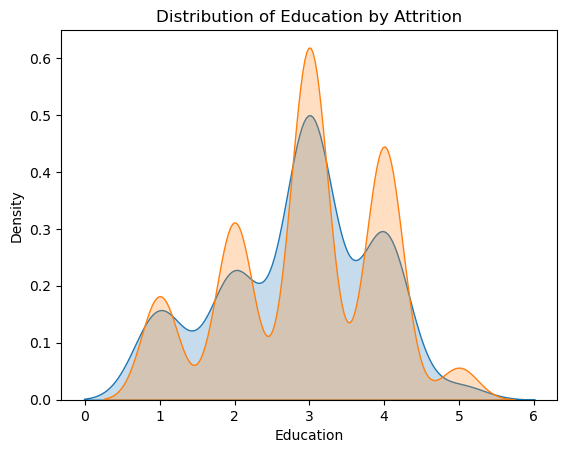

Skipping EmployeeCount as it has zero variance.


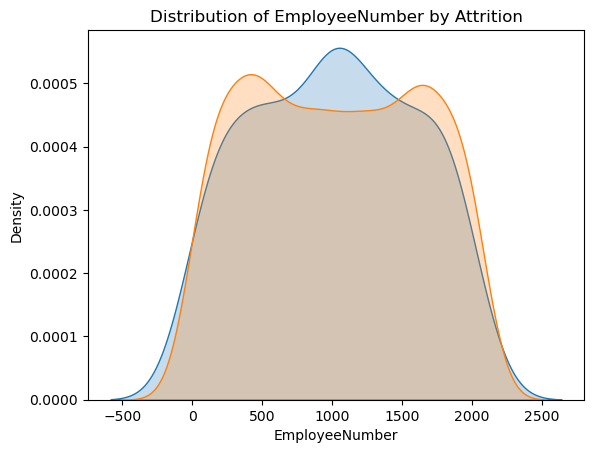

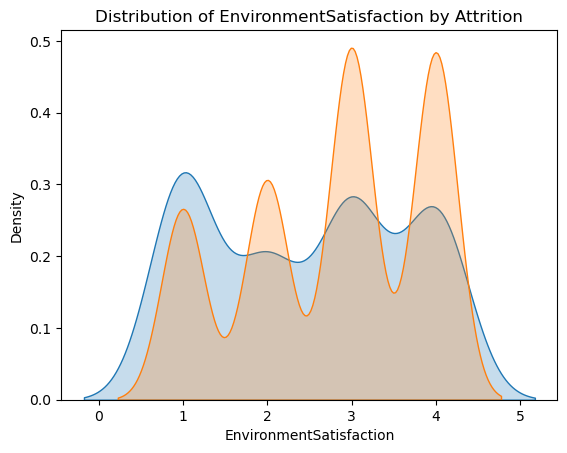

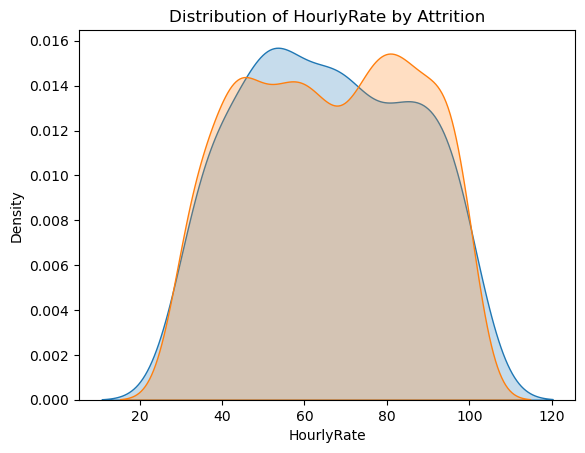

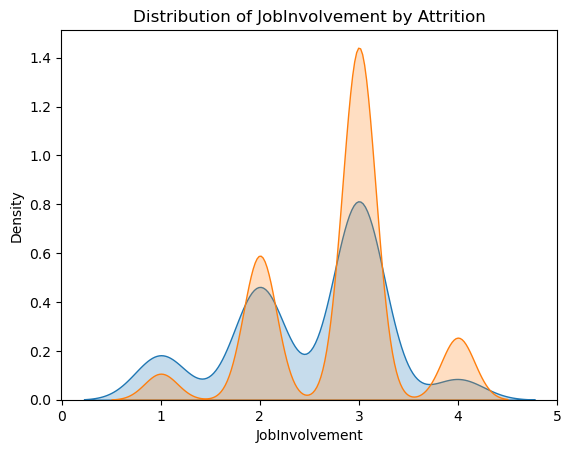

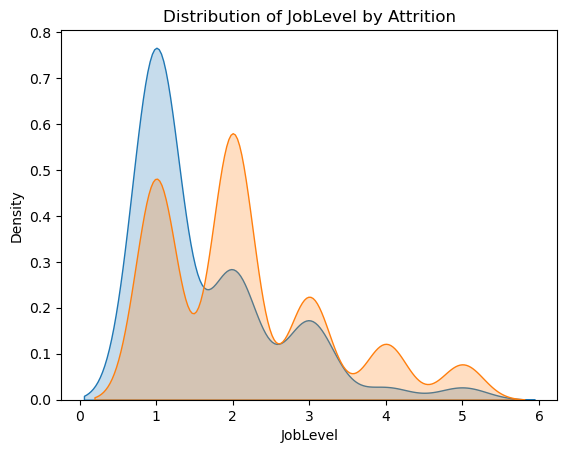

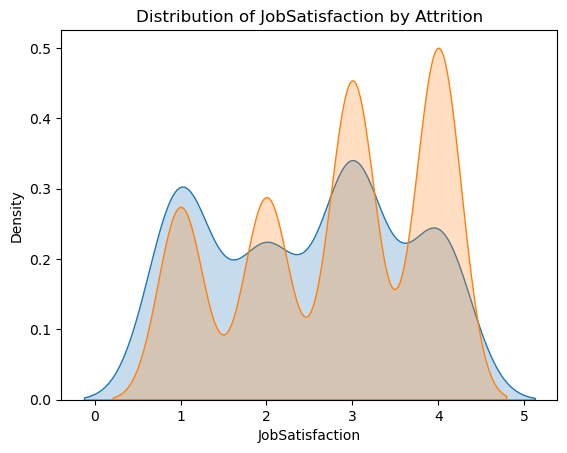

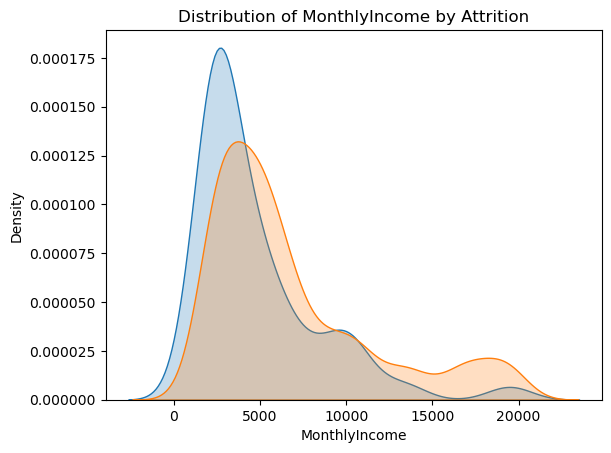

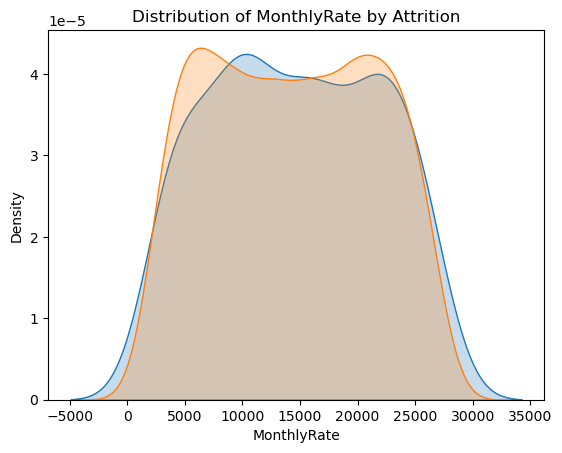

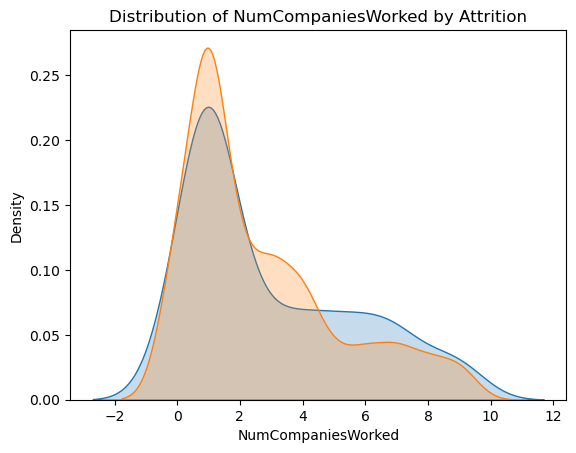

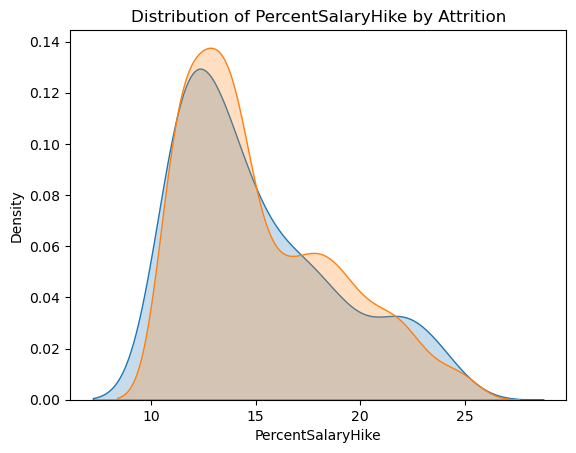

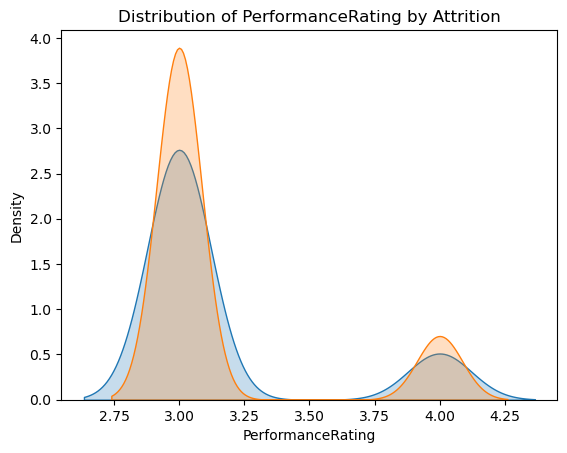

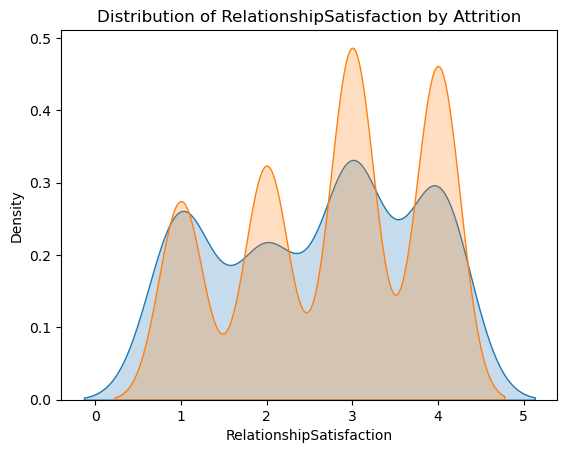

Skipping StandardHours as it has zero variance.


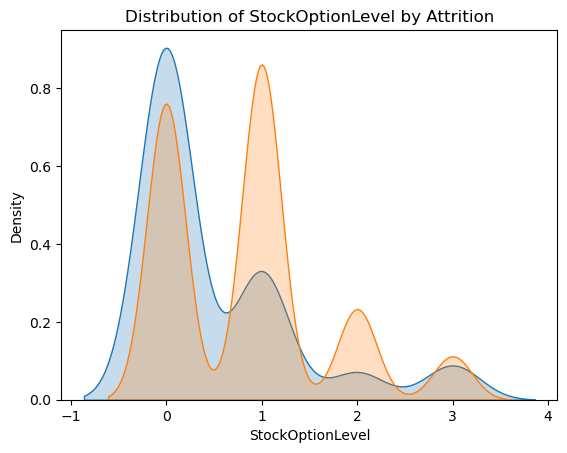

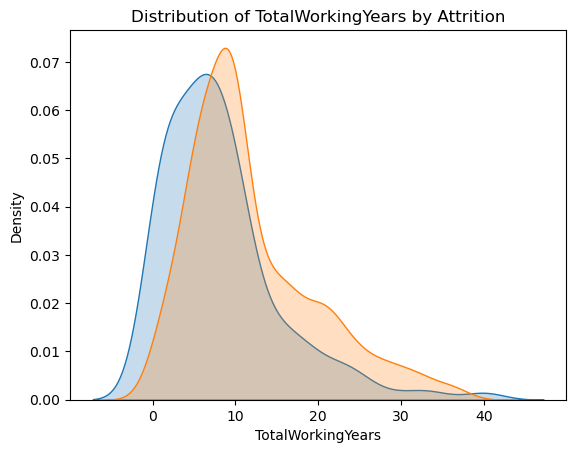

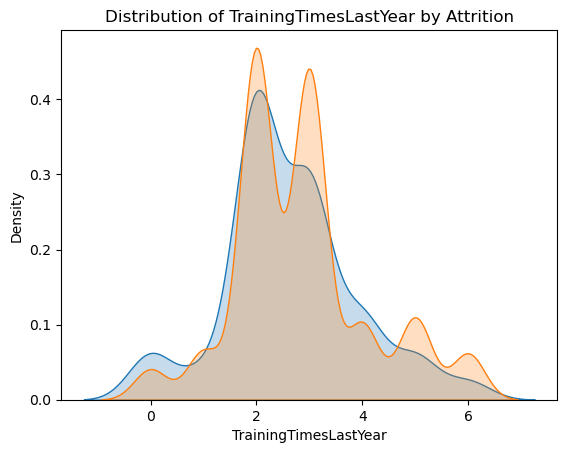

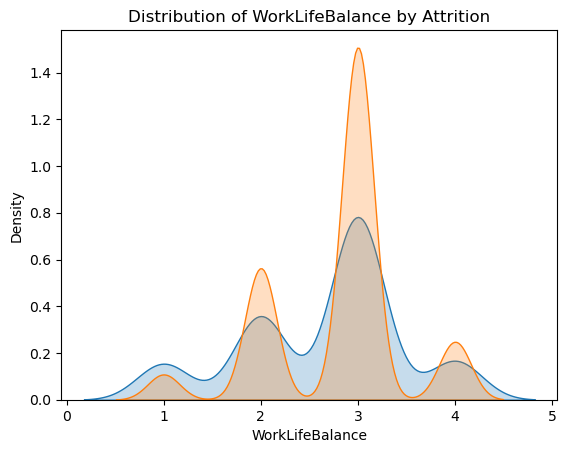

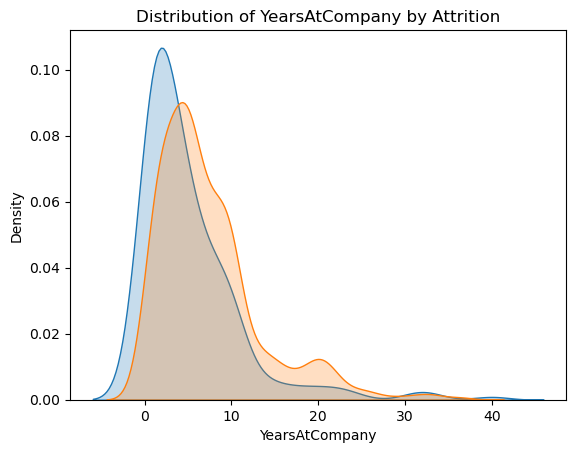

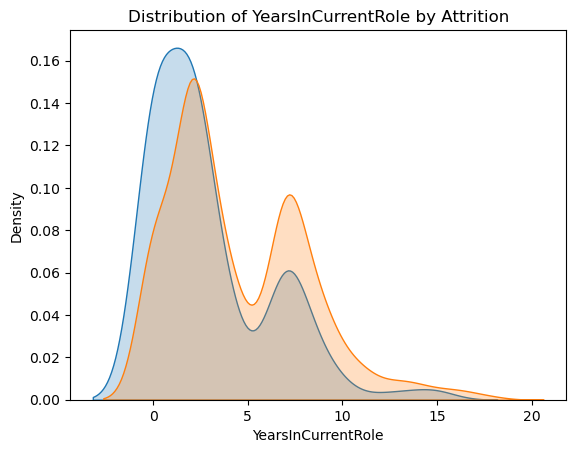

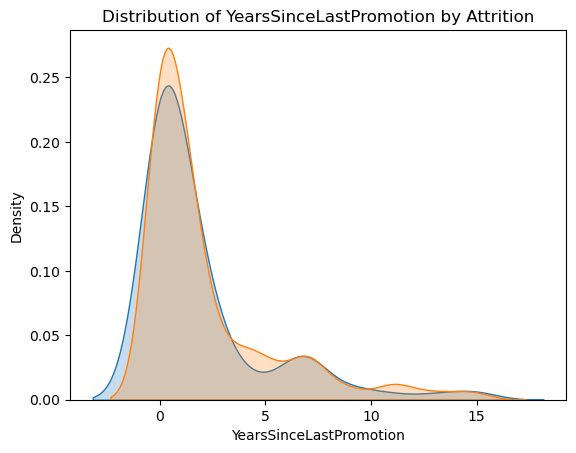

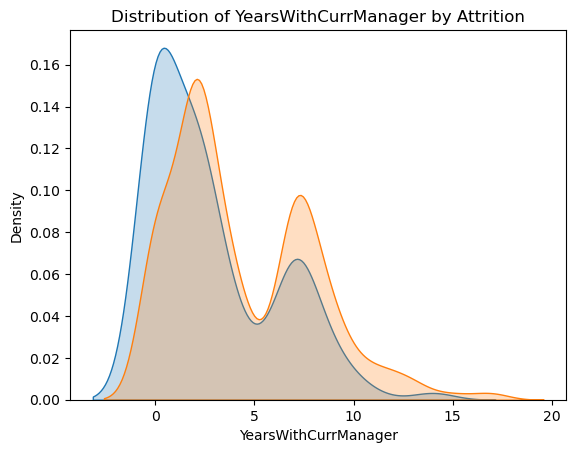

In [10]:
# Distribution of numeric features by Attrition
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size outside the loop
plt.figure(figsize=(8, 5))

for feature in numeric_features:
    # Check if the feature has zero variance
    if data[feature].nunique() > 1:
        sns.kdeplot(data[data['Attrition'] == 1][feature], label='Attrition: Yes', fill=True, warn_singular=False)
        sns.kdeplot(data[data['Attrition'] == 0][feature], label='Attrition: No', fill=True, warn_singular=False)
        plt.title(f'Distribution of {feature} by Attrition')
        plt.show()
    else:
        print(f"Skipping {feature} as it has zero variance.")


# Counting the plots for categorical features

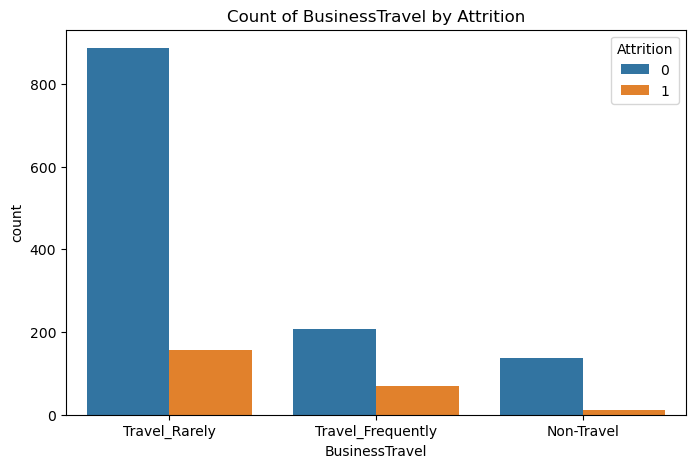

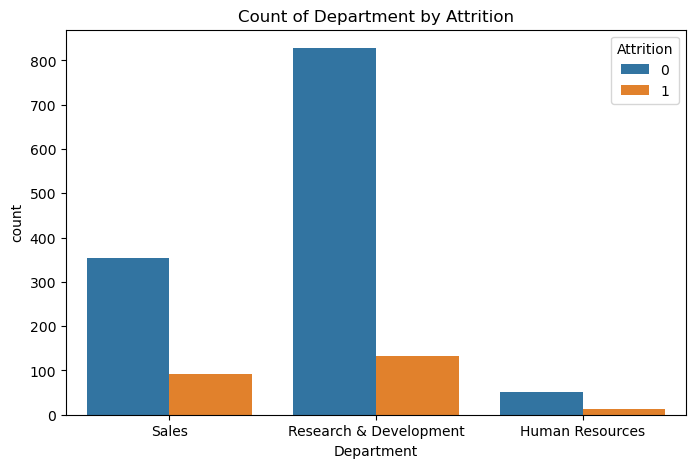

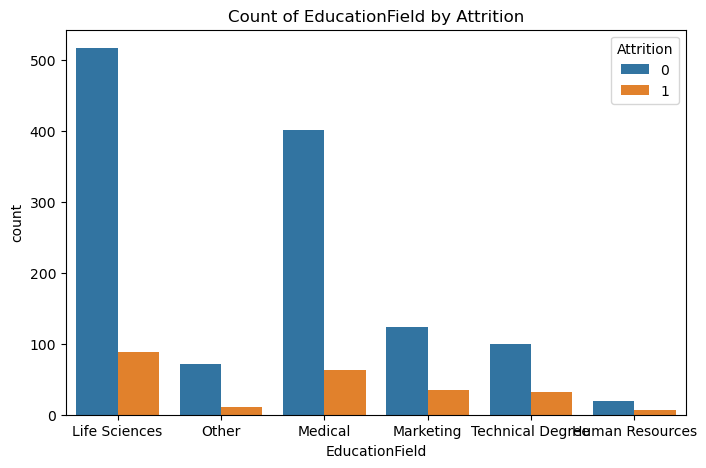

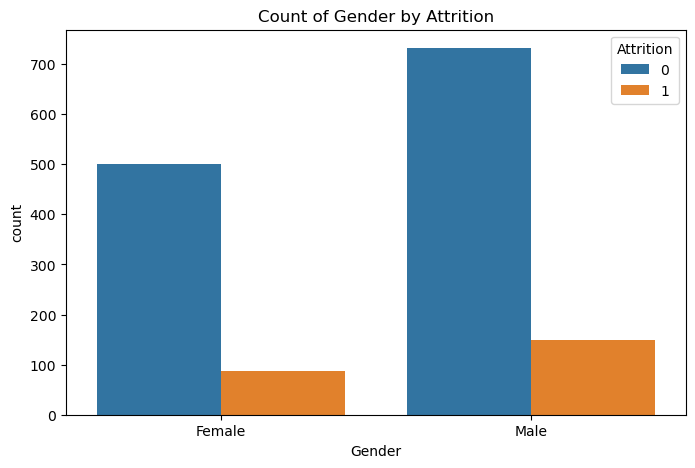

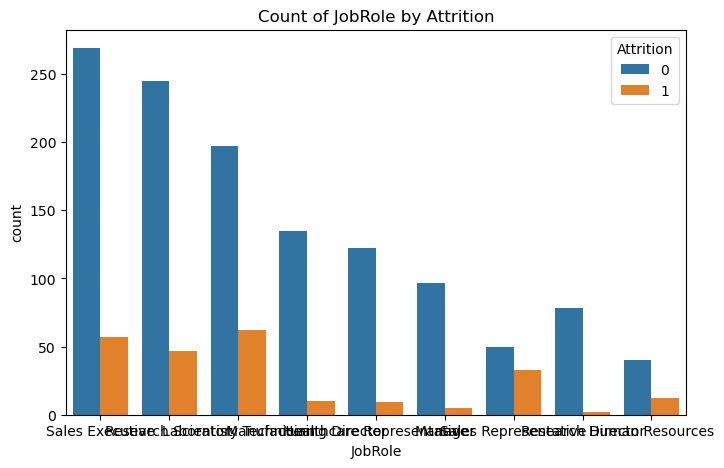

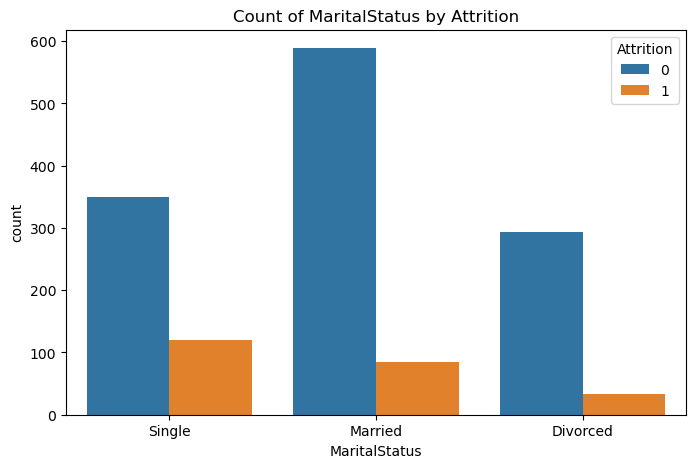

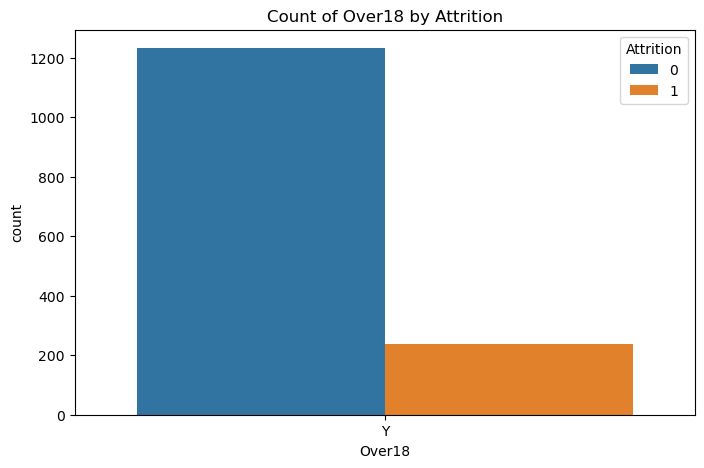

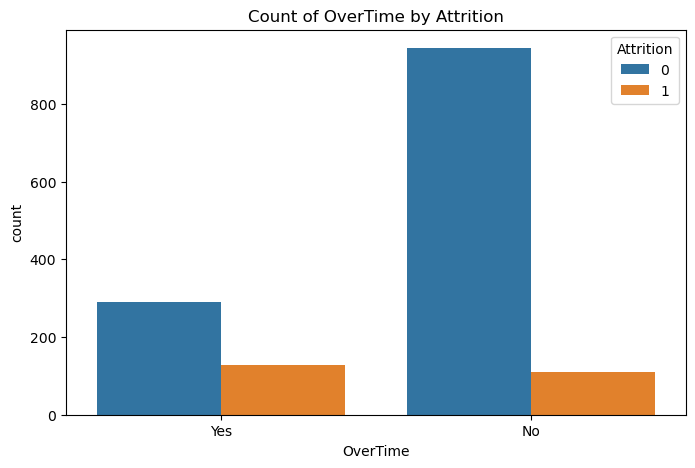

In [11]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Attrition', data=data)
    plt.title(f'Count of {feature} by Attrition')
    plt.show()


# Data Preprocessing

In [12]:
data = data.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Encode binary categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['OverTime'] = le.fit_transform(data['OverTime'])
data['Attrition'] = le.fit_transform(data['Attrition'])

# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Handle missing data using K-nearest neighbors imputation
def impute_missing_knn(X):
    imputer = KNNImputer(n_neighbors=5)
    return pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Log-transform skewed features
def log_transform(X):
    X['MonthlyIncome'] = np.log1p(X['MonthlyIncome'])
    return X

# Define preprocessing steps using a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', FunctionTransformer(impute_missing_knn), ['NumCompaniesWorked', 'TotalWorkingYears']),
        ('log_transform', FunctionTransformer(log_transform), ['MonthlyIncome'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])



# Splitting the data for Model Training 

In [13]:
# Split the data into features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the model using the pipeline

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knn_imputer',
                                                  FunctionTransformer(func=<function impute_missing_knn at 0x0000025DC6C9CA40>),
                                                  ['NumCompaniesWorked',
                                                   'TotalWorkingYears']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x0000025DC6C9C2C0>),
                                                  ['MonthlyIncome'])])),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

# Making Predictions and Evaluating the model (Achieved Accuracy:87.47%)

In [15]:
y_pred = pipeline.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", f"{accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 87.41%
Confusion Matrix:
[[254   1]
 [ 36   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



# Printing the columns for Checking and Further Fine Tuning Process

In [16]:
print(data.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobR

# Hyper Parameter Fine Tuning the Model (Achieved Accuracy: 87.76%)

In [17]:
# Define hyperparameters for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print("Accuracy:", f"{accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Best Hyperparameters: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Accuracy: 87.76%
Confusion Matrix:
[[254   1]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



# Save the tuned model in a Pickle file format

In [18]:
import joblib
joblib.dump(best_model, 'Emp_model.pkl')

['Emp_model.pkl']

# Creating Interactive Dash Board Web Application

 Run This Below Code with Different Port Address

In [21]:
# Install necessary libraries if you haven't already
# pip install dash plotly pandas

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your actual dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
data = pd.read_csv(r"C:\Users\SAI DINESH\Downloads\archive (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),

    # Dropdown for selecting features
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': col, 'value': col} for col in data.columns
        ],
        value=data.columns[0],  # Default selected feature
        style={'width': '50%'}
    ),

    # Scatter plot to show the relationship between the selected feature and attrition
    dcc.Graph(id='scatter-plot'),

    # Histogram for the selected feature
    dcc.Graph(id='histogram'),

    # Pie chart to show the distribution of attrition
    dcc.Graph(id='pie-chart'),

    # Add more components as needed for your dashboard
])

# Define callback to update the scatter plot, histogram, and pie chart based on feature selection
@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('histogram', 'figure'),
     Output('pie-chart', 'figure')],
    [Input('feature-dropdown', 'value')]
)
def update_visualizations(selected_feature):
    # Scatter plot
    scatter_fig = px.scatter(data, x=selected_feature, y='Attrition', color='Attrition',
                             title=f'Scatter Plot - {selected_feature}')

    # Histogram
    histogram_fig = px.histogram(data, x=selected_feature, color='Attrition',
                                 title=f'Histogram - {selected_feature}')

    # Pie chart
    pie_chart_fig = px.pie(data, names='Attrition', title='Attrition Distribution')

    return scatter_fig, histogram_fig, pie_chart_fig

# Run the app on port 8080
if __name__ == '__main__':
    app.run_server(debug=True, port=8080)
